<a href="https://colab.research.google.com/github/mhankazis/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

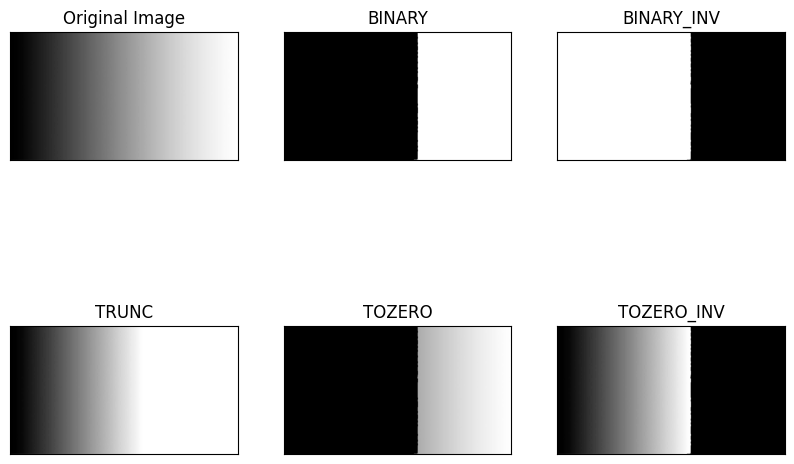

In [3]:
# Membaca citra
image = cv.imread('/content/drive/MyDrive/gradient.jpg', 0)  # Path diubah sesuai lokasi citra

# Threshold values
threshold = 170

# Berbagai metode threshold
_, binary = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
_, binary_inv = cv.threshold(image, threshold, 255, cv.THRESH_BINARY_INV)
_, truncate = cv.threshold(image, threshold, 255, cv.THRESH_TRUNC)
_, tozero = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO)
_, tozero_inv = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO_INV)

# Plot hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, binary, binary_inv, truncate, tozero, tozero_inv]

plt.figure(figsize=(10, 7))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

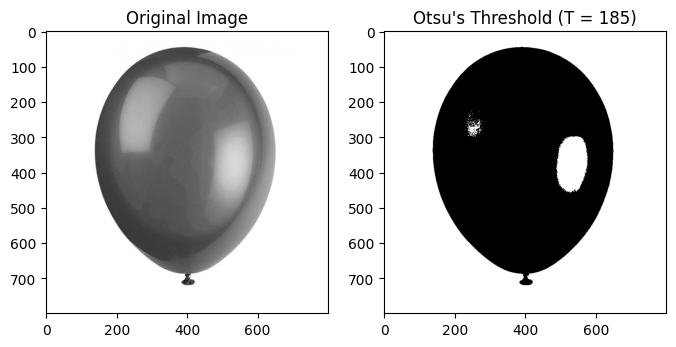

In [4]:
# Membaca citra balloon.jpg
image = cv.imread('/content/drive/MyDrive/balloon.jpg', 0)

# Menghitung histogram
hist = cv.calcHist([image], [0], None, [256], [0, 256])

# Menentukan threshold secara manual menggunakan metode Otsu
total_pixels = image.shape[0] * image.shape[1]
current_max, threshold = 0, 0
sumT, sumF = 0, 0
for i in range(256):
    sumT += i * hist[i][0]

weightB, weightF, sumB = 0, 0, 0
for i in range(256):
    weightB += hist[i][0]
    if weightB == 0:
        continue
    weightF = total_pixels - weightB
    if weightF == 0:
        break

    sumB += i * hist[i][0]
    meanB = sumB / weightB
    meanF = (sumT - sumB) / weightF
    between_var = weightB * weightF * (meanB - meanF) ** 2

    if between_var > current_max:
        current_max = between_var
        threshold = i

# Thresholding menggunakan nilai threshold Otsu
_, otsu = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)

# Plot hasil
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(otsu, 'gray')
plt.title(f"Otsu's Threshold (T = {threshold})")
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

  1. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  
  2. Buka link berikut https://opencv-
tutorial.readthedocs.io/en/latest/histogram/histogram.html
  
  3. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).








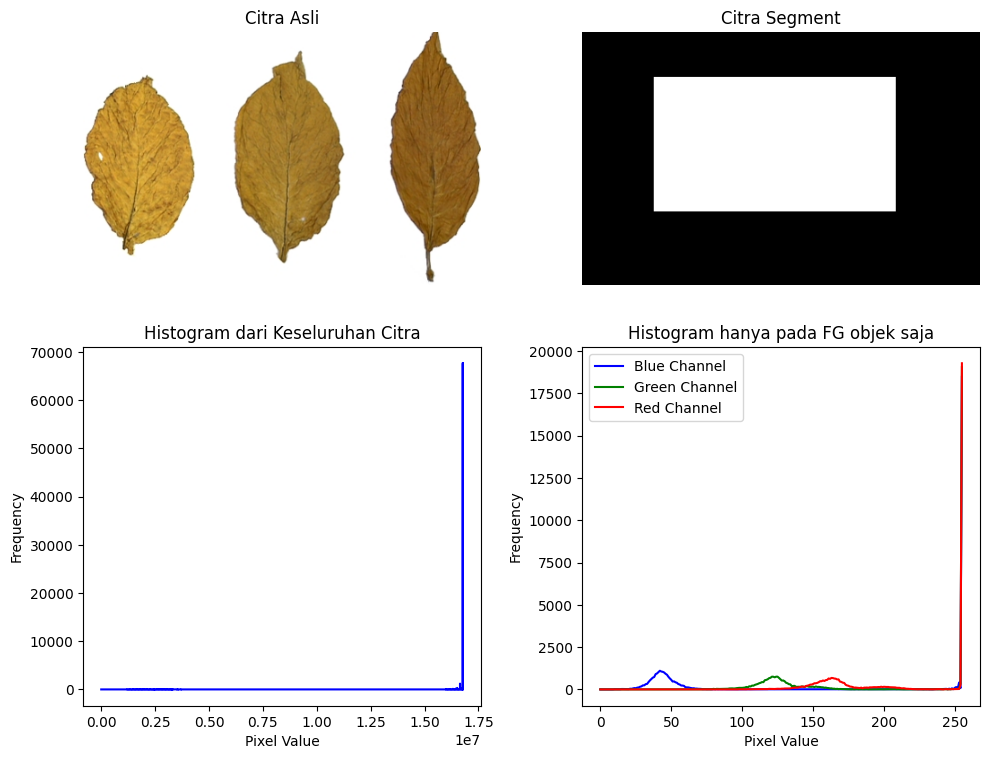

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv.imread('/content/drive/MyDrive/tobacco.jpg')  # Ganti dengan path ke file tobacco.jpg
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Create mask for segmentation
mask = np.zeros(img.shape[:2], np.uint8)
mask[50:200, 80:350] = 255  # Sesuaikan area untuk menutupi daun (bagian foreground)

# Calculate histograms
hist_full = cv.calcHist([img], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_segmented_b = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_segmented_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_segmented_r = cv.calcHist([img], [2], mask, [256], [0, 256])

# Plotting the results
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Segmented Image
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

# Histogram of the entire image
plt.subplot(2, 2, 3)
plt.plot(hist_full.flatten(), color='blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Histogram of the segmented image
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_b, color='blue', label='Blue Channel')
plt.plot(hist_segmented_g, color='green', label='Green Channel')
plt.plot(hist_segmented_r, color='red', label='Red Channel')
plt.title('Histogram hanya pada FG objek saja')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

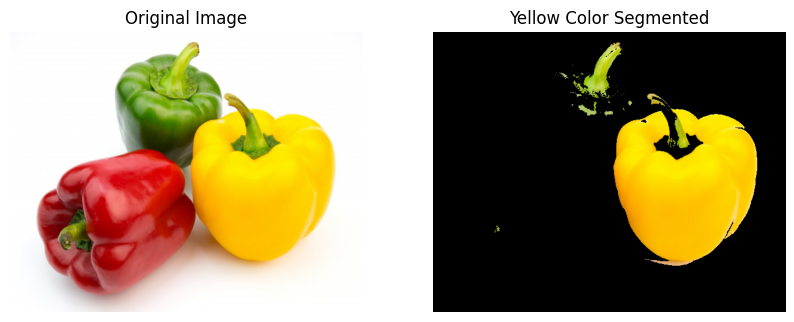

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv.imread('/content/drive/MyDrive/peppers.jpg')  # Ganti dengan path gambar Anda
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Filter out only yellow color
# Adjust index based on your clustering
mask = (labels.flatten() == 2)  # Ubah '2' ke indeks yang sesuai untuk warna kuning dalam cluster Anda

# Reshape the mask to match the image dimensions
mask = mask.reshape(img.shape[:2])

# Apply the mask to the image
yellow_segment = np.copy(img)
yellow_segment[~mask] = [0, 0, 0]  # Set non-yellow areas to black

# Display the segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(yellow_segment)
plt.title('Yellow Color Segmented')
plt.axis('off')

plt.show()


7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

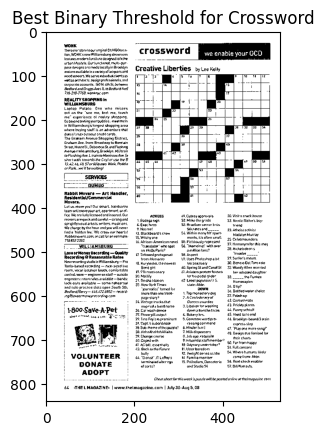

In [8]:
img = cv.imread('/content/drive/MyDrive/crossword.jpg', 0)
_, binary_thresh = cv.threshold(img, 150, 255, cv.THRESH_BINARY)  # Adjust value for best result

plt.figure()
plt.imshow(binary_thresh, 'gray')
plt.title('Best Binary Threshold for Crossword')
plt.show()